## Redeanteile im Bundestag in der Legislatuperiode 2017-2021

Ziel ist eine übersichtliche Darstellung der Redeanteile im Bundestag in der Legislaturperiode von 2017 - 2021.  
Zuerst werden alle Reden in eine Liste geladen. Diese Liste von Reden wird dann nach und nach ausgewertet wird.

import der benötigten packages

In [5]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

Hier werden die Reden in das Programm geladen, damit wir sie einfach zugänglich haben

In [6]:

path = "../../data/"

legis_period = 20

name_of_file = f'speeches_{legis_period}.jsonl'
with open(f'{path}{name_of_file}', 'r', encoding = 'utf8') as fp:
    data = list(fp)

speeches = []
for line in data:
    speeches.append(json.loads(line))

alleReden = speeches.copy()

#with open('../../data/speeches_19.jsonl', 'r') as fp:
#    data = json.load(fp)

In [7]:
print(len(alleReden))
#alleReden[120]

10791


Hier erstellen wir für jede Partei eine Variable mit den in der Realität verwendeten Farben. Die benötigen wir später um unsere Grafiken anschaulicher zu gestalten

In [8]:
# Erstellen eines Dictionaries, welches die Farbcodes beinhaltet
colorcode={'AfD':'#009ee0',
           'BÜNDNIS 90/DIE GRÜNEN':'#46962b',
           'CDU/CSU':'#949494',
           'DIE LINKE':'#800080',
           'FDP':'#ffed00',
           'SPD':'#e3000f', 
          }#'FRAKTIONSLOS': '#808080'}

# Hier werden ein paar Parameter gesetzt, die bestimmen wie unsere Grafiken später aussehen. Das ist für die Funktionalität des Programms nicht notwendig
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

Um später eine Statistik erstellen zu können, müssen wir unsere Daten umstrukturieren. In der folgenden Zelle wird von jeder Rede die Länge der Rede in einer neuen Liste gespeichert. Gleichzeitig erstellen wir eine Liste die für jede Rede den Namen der redenden Person und ihre Parteizugehörigkeit abspeichert.

In [9]:

input_list = []
wort_haeufigkeiten =[]

for rede in alleReden:
    #if len(rede['text_lem'])>0:
    if len(rede['text'])>0:    
    #if rede['name']=='Angela Merkel':
        #wort_haeufigkeiten.append(len(rede['text_lem']))
        wort_haeufigkeiten.append(len(rede['text']))
        input_dict = {
            'name'  : rede["name"],
            'party' : rede["party"],
        }
        input_list.append(input_dict)

Mithilfe der eben erstellten List können wir ein Histogramm erstellen, welches uns über die Länge der gehaltenen Reden informiert

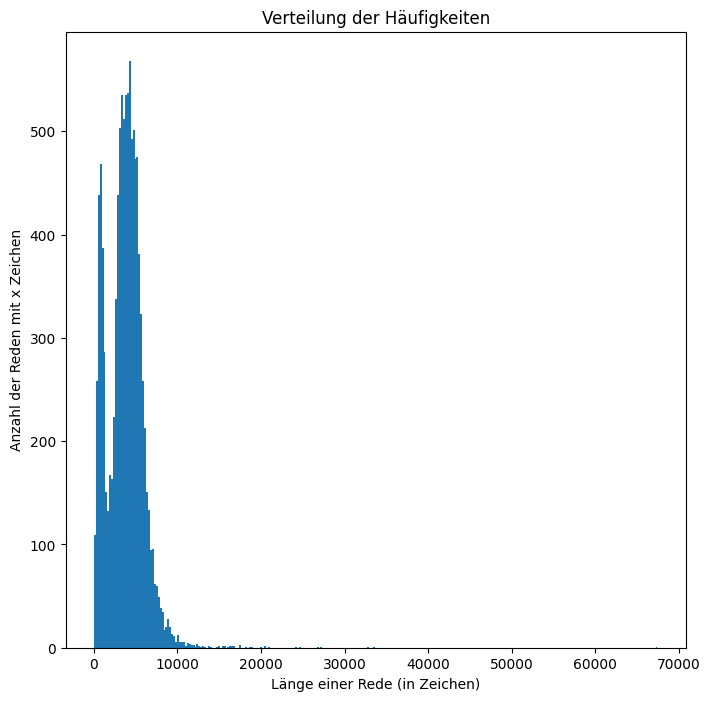

In [10]:
mpl.rcParams["figure.figsize"] = (8,8)

plt.hist(wort_haeufigkeiten, bins ='auto')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Länge einer Rede (in Zeichen)")
plt.ylabel("Anzahl der Reden mit x Zeichen")

plt.show()


Anfangs werden die Daten bereinigt, um Formatfehler zu beseitigen (Unterschiede in der Groß- und Kleinschreibung).
Anschließend wird ausgezählt, wie viele Reden jeder Redner gehalten hat.

In [11]:
Haeufigkeiten = []
Namen = []

# Bereinigung von Datenfehlern, damit unsere Reden korrekt angezeigt werden können.
# Danach werden die Namen in einer Liste abgespeichert. Dabei werden auch Duplikate erzeugt.
for i in range(0, len(input_list)):
    Namen.append(input_list[i]['name'])
    Namen[i] = Namen[i].replace(u'\xa0', u' ')
    Namen[i] = str.lower(Namen[i])

# Dies ist eine Liste mit allen Menschen die eine Rede gehalten haben (ohne Duplikate)
Nameneinzeln_int = sorted(set(Namen))

# Wir berechnen für jeden Namen, wieviele Reden die Person gehalten hat, und speichern den Wert in der Liste Häufigkeiten.
for i in range(0, len(Nameneinzeln_int)-1):
    summe = 0
    for j in range(0, len(Namen)):
        if Nameneinzeln_int[i]==Namen[j]:
            summe = summe+1
        else: next
    Haeufigkeiten.append(summe)    


Durch einen Collections Counter lassen sich die 10 Top-Redner schnell identifizieren:

In [12]:
import collections
counter = collections.Counter(Namen).most_common()
counter


for i in range(0,10):
    print(counter[i])



('olaf scholz', 171)
('nancy faeser', 97)
('klara geywitz', 88)
('bettina stark-watzinger', 86)
('christian lindner', 86)
('robert habeck', 81)
('karl lauterbach', 79)
('svenja schulze', 77)
('annalena baerbock', 73)
('stephan brandner', 65)


Es fällt auf, dass die 10 Topredner fasst ausschließlich Ministerposten innehaben.

Durch eine graphische Darstellung lässt sich die Verteilung der Daten besser nachvollziehen. Auch hier benutzen wir wieder ein Histogramm. Dieses Mal sind die Achsenbeschriftungen allerdings andere.

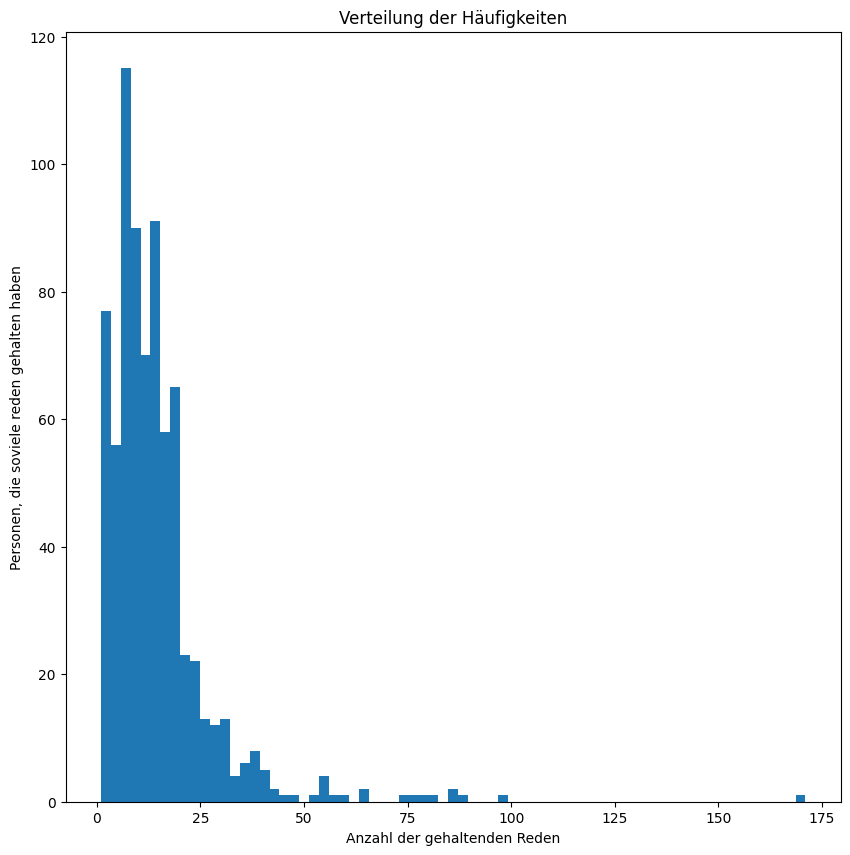

In [13]:
mpl.rcParams["figure.figsize"] = (10,10)

plt.hist(Haeufigkeiten, bins='auto')

plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Anzahl der gehaltenden Reden")
plt.ylabel("Personen, die soviele reden gehalten haben")
plt.show()


In [15]:
# diese Methode erstellt auch eine Liste der Personen, die eine Rede gehalten haben, inklusive der Info, wie oft sie eine Rede gehalten haben. Allerdings können wir
# zusätzlich noch auf die Partei der Personen bedingen. Dadurch eröffnen sich uns weitere Möglichkeiten beim Erstellen der Grafiken.
def get_haeufigkeiten_für_partei(party):

    # Erstellen einer Hilfsvariable
    temp = []

    # Filtern auf Parteimitglieder
    for rede in input_list:
        if rede['party']==party:
            temp.append(rede)

    # Auch hier bereinigen wir die Daten wieder.
    Namen = []
    for i in range(0, len(temp)):
        Namen.append(temp[i]['name'])
        Namen[i] = Namen[i].replace(u'\xa0', u' ')
        Namen[i] = str.lower(Namen[i])
    # Durch den Befehl set() auf einer Liste angewandt werden Duplikate entfernt
    Nameneinzeln = sorted(set(Namen))

    # Für jedes Parteimitglied wird nun gezählt, wieviele Reden es gehalten hat
    Haeufigkeiten = []
    for i in range(0, len(Nameneinzeln)-1):
        summe = 0
        for j in range(0, len(Namen)):
            if Nameneinzeln[i]==Namen[j]:
                summe = summe+1
            else: next
        Haeufigkeiten.append(summe)    

    # Diese Anzahl der gehaltenen Reden wird dann zurückgegeben
    return Haeufigkeiten
            

In [16]:
# Die Methode führen wir jetzt für alle Parteien im Bundestag aus
par1 = get_haeufigkeiten_für_partei('AfD')
par2 = get_haeufigkeiten_für_partei('BÜNDNIS 90/DIE GRÜNEN')
par3 = get_haeufigkeiten_für_partei('CDU/CSU')
par4 = get_haeufigkeiten_für_partei('DIE LINKE')
par5 = get_haeufigkeiten_für_partei('FDP')
par6 = get_haeufigkeiten_für_partei('SPD')

Wir erstellen eigentlich das gleiche Histogramm wie gerade, allerdings färben wir die Anteile der Parteien ein. Hier kommen uns die Colorcodes von ganz am Anfang zu gute, sowie die Methode von eben gerade.

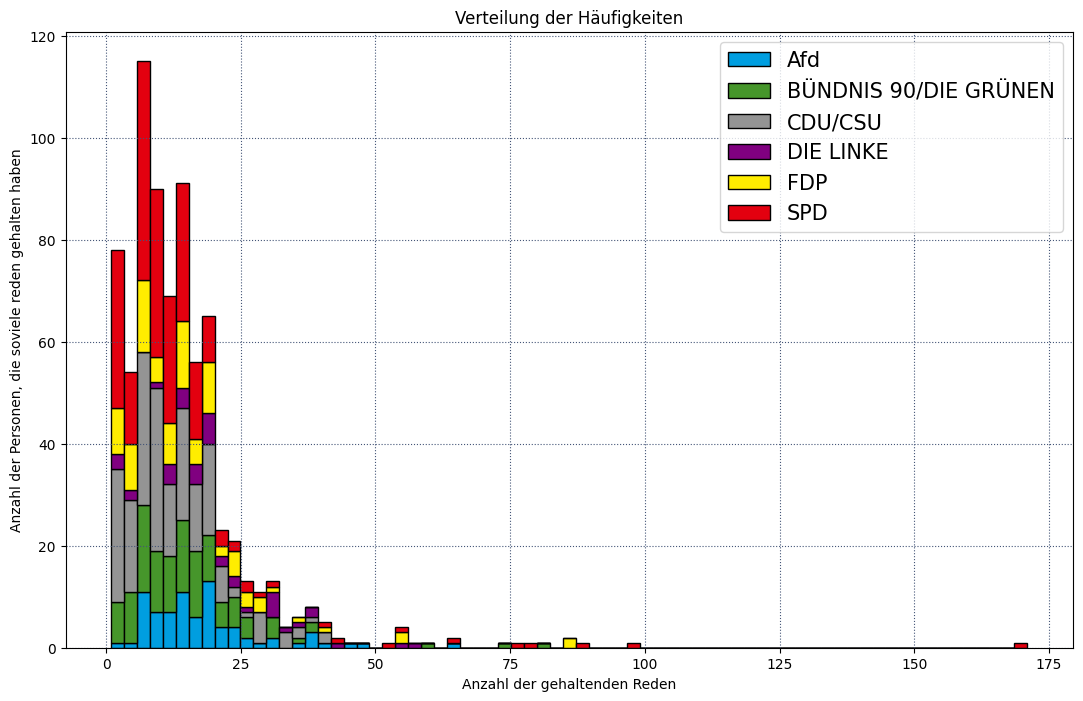

In [18]:
mpl.rcParams["figure.figsize"] = (13,8)
fig = plt.figure()

plt.hist([par1,par2,par3,par4,par5,par6], bins='auto', stacked=True, 
         color =colorcode.values(), edgecolor='black', label=['Afd','BÜNDNIS 90/DIE GRÜNEN','CDU/CSU','DIE LINKE','FDP','SPD'])
plt.grid(visible=True, which='major', color='#445577', linestyle=':')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Anzahl der gehaltenden Reden")
plt.ylabel("Anzahl der Personen, die soviele reden gehalten haben")
plt.legend(prop={'size': 15})
plt.show()

from pathlib import Path
fn = Path('~/Documents/parla_hist.svg').expanduser()
fig.savefig(fn, bbox_inches='tight', pad_inches=0)

Der Großteil der Redner hat nicht öfter als 50x mal im Bundestag eine Rede gehalten. Diese Vermutung überprüfen wir noch einmal mit folgendem Code:


In [19]:
# Die maximale Anzahl an Reden die eine Person gehalten haben darf
grenzwert = 50
# Ein Zähler für die Anzahl der Personen, die weniger als "grenzwert" Reden gehalten haben.
redner_unter_grenzwert = 0

# Wenn die Person unterhalb des Grenzwertes liegt, setzen wir unseren Zähler einen nach oben
for i in range(0, len(Nameneinzeln_int)-1):
    if Haeufigkeiten[i] <= grenzwert:
        redner_unter_grenzwert=redner_unter_grenzwert+1
    else: 
        next

# Unser Ergebnis geben wir dann auf der Konsole aus
print("Redner insgesamt: " + 
      str(len(Nameneinzeln_int)) + "\n" + "Redner, welche weniger als " + 
      str(grenzwert) + " Reden gehalten haben: " + 
      str(redner_unter_grenzwert))

Redner insgesamt: 751
Redner, welche weniger als 50 Reden gehalten haben: 732


Folgende Auswertungen analysieren die Anzahl der Reden auf Parteilicher Ebene:

In [20]:
Haeufigkeitenparty = []
Party = []

# Hier werden die Daten wieder bereinigt
for i in range(0, len(input_list)):
    Party.append(input_list[i]['party'])
    Party[i] = Party[i].replace(u'\xa0', u' ')
    Party[i] = str.upper(Party[i])

# Ähnlich wie bei den Namen erzeugen wir eine eindeutige Liste an Parteien, zu denen ein Redner gehören kann.
Partyeinzeln = sorted(set(Party))

Haeufigkeitenparty = []

# Wir zählen dann für jede der Parteien, wie oft ein Mitglied der Partei eine Rede gehalten hat
for i in range(0, len(Partyeinzeln)):
    summe = 0
    for j in range(0, len(Party)):
        if Partyeinzeln[i]==Party[j]:
            summe = summe+1
        else: next
    Haeufigkeitenparty.append(summe)

Die Häufigkeiten der gehaltenen Reden der Parteien werden nun in einem Plot dargestellt.

In [21]:
colorcode1={'AfD':'#009ee0',
           'Bremen':'#000000',
           'BÜNDNIS 90/DIE GRÜNEN':'#46962b',
           'CDU/CSU':'#000000',
           'DIE LINKE':'#800080',
           'FDP':'#ffed00',
           'SPD':'#e3000f', 
           'FRAKTIONSLOS': '#808080'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


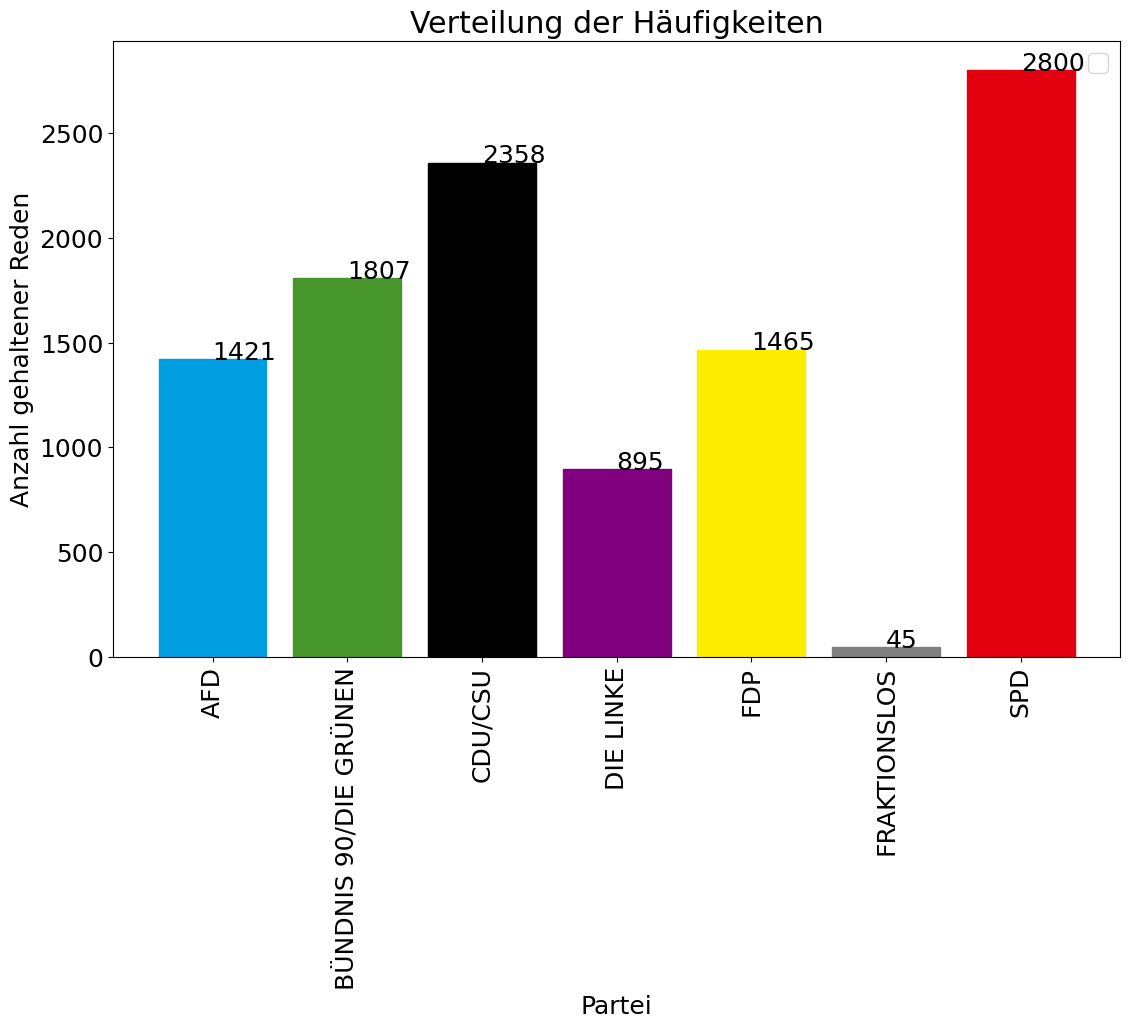

In [24]:

plt.rc('font', size=18)
bar = plt.bar(Partyeinzeln, Haeufigkeitenparty)
plt.title("Verteilung der Häufigkeiten")
plt.xticks(ticks=range(len(Partyeinzeln)), labels=Partyeinzeln, rotation=90)
bar[0].set_color(colorcode1['AfD'])
bar[1].set_color(colorcode1['BÜNDNIS 90/DIE GRÜNEN'])
bar[2].set_color(colorcode1['CDU/CSU'])
bar[3].set_color(colorcode1['DIE LINKE'])
bar[4].set_color(colorcode1['FDP'])
bar[5].set_color(colorcode1['FRAKTIONSLOS'])
bar[6].set_color(colorcode1['SPD'])
plt.xlabel("Partei")
plt.ylabel("Anzahl gehaltener Reden")

for i in range(0, len(Partyeinzeln)):
    plt.text(i, Haeufigkeitenparty[i],
             str(Haeufigkeitenparty[i]))
    
plt.legend()
plt.show()

Die Verteilung der Reden folgt relativ knapp der Sitzplatzverteilung im Bundestag. Es kommen also alle Parteien entsprechend ihrer Sitze zu Wort.

Die folgenden Zellen bereiten noch ein paar schöne Grafiken auf

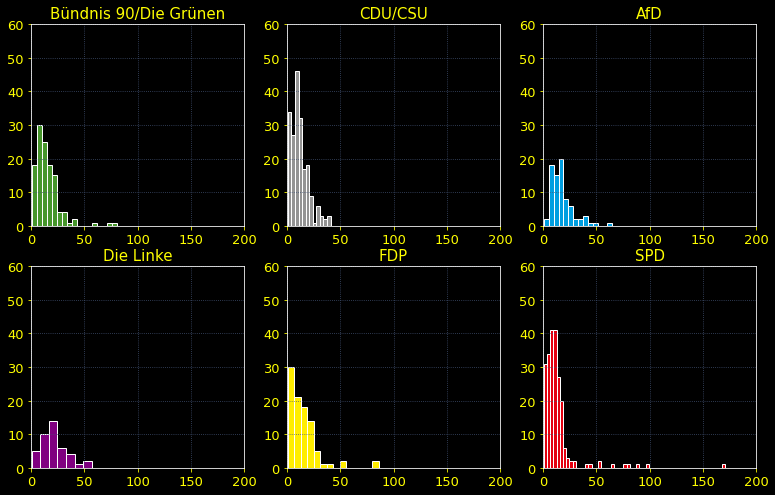

In [25]:
        
def haeufigkeiten_nach_partei(partei):
    
    #Initilaisieren der Benötigten Listen
    Haeufigkeiten = []
    Namen = []
    input_gefiltert = []
    
    #Filtern der Reden, sodass nur die Reden einer Partei in input_gefiltert auftauchen
    for rede in alleReden:
        if str.lower(rede['party'])==str.lower(partei):
            input_gefiltert.append(rede)
    
    #Herausschreiben der Redner, um im folgenden Schritt die Anzahl der Reden zu zählen
    for input_gef in input_gefiltert:
        Name_trial = input_gef['name']
        Name_trial = Name_trial.replace(u'\xa0', u' ')
        Name_trial = Name_trial.lower()
        Namen.append(Name_trial)

    Namen_einzeln = sorted(set(Namen))

    #Zählen der gehaltenen Reden pro Person
    for Name in Namen_einzeln:
            summe = 0
            for j in range(0, len(Namen)):
                if Name == Namen[j]:
                    summe += 1
            Haeufigkeiten.append(summe) 
    
    return Haeufigkeiten

def plot_haeufigkeiten(Liste_der_Parteien):
    #fig.set_alpha(0.6)
    plt.rc('font', size=13)
    mpl.rcParams["figure.figsize"] = (13,8)
    mpl.rcParams['figure.dpi'] = 72
    
    COLOR = 'yellow'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = 'white'
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    #Initialisieren der Plots
    figure, axis = plt.subplots(2, 3)
    figure.set_facecolor('black')
    figure.set_alpha(0.01)
    
    axis[0, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[0]), bins='auto', color=colorcode['BÜNDNIS 90/DIE GRÜNEN'], edgecolor='white')
    axis[0, 0].set_title(Liste_der_Parteien[0], fontsize = 15)
    axis[0, 0].set_xlim(left=0, right=200)
    axis[0, 0].set_ylim(bottom=0, top=60)
    axis[0, 0].set_facecolor("black")
    axis[0, 0].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[0, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[1]), bins='auto', color=colorcode['CDU/CSU'], edgecolor='white')
    axis[0, 1].set_title(Liste_der_Parteien[1], fontsize = 15)
    axis[0, 1].set_xlim(left=0, right=200)
    axis[0, 1].set_ylim(bottom=0, top=60)
    axis[0, 1].set_facecolor("black")
    axis[0, 1].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    #axis[0, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[2]), bins = 75)
    #axis[0, 2].set_title(Liste_der_Parteien[2], fontsize = 25)
    
    axis[0, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[3]), bins='auto', color=colorcode['AfD'], edgecolor='white')
    axis[0, 2].set_title(Liste_der_Parteien[3], fontsize = 15)
    axis[0, 2].set_xlim(left=0, right=200)
    axis[0, 2].set_ylim(bottom=0, top=60)
    axis[0, 2].set_facecolor("black")
    axis[0, 2].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[4]), bins='auto', color=colorcode['DIE LINKE'], edgecolor='white')
    axis[1, 0].set_title(Liste_der_Parteien[4], fontsize = 15)
    axis[1, 0].set_xlim(left=0, right=200)
    axis[1, 0].set_ylim(bottom=0, top=60)
    axis[1, 0].set_facecolor("black")
    axis[1, 0].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[5]), bins='auto', color=colorcode['FDP'], edgecolor='white')
    axis[1, 1].set_title(Liste_der_Parteien[5], fontsize = 15)
    axis[1, 1].set_xlim(left=0, right=200)
    axis[1, 1].set_ylim(bottom=0, top=60)
    axis[1, 1].set_facecolor("black")
    axis[1, 1].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[6]), bins='auto', color=colorcode['SPD'], edgecolor='white')
    axis[1, 2].set_title(Liste_der_Parteien[6], fontsize = 15)
    axis[1, 2].set_xlim(left=0, right=200)
    axis[1, 2].set_ylim(bottom=0, top=60)
    axis[1, 2].set_facecolor("black")
    axis[1, 2].grid(visible=True, which='major', color='#445577', linestyle=':')
    #axis[2, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[7]), bins = 75)
    #axis[2, 1].set_title(Liste_der_Parteien[7], fontsize = 25)


    # Combine all the operations and display
    plt.show()
    
    from pathlib import Path
    fn = Path('~/Documents/party_hist.svg').expanduser()
    figure.savefig(fn, bbox_inches='tight', pad_inches=0)
    
    

Liste_der_Parteien = ["Bündnis 90/Die Grünen","CDU/CSU","Bremen","AfD","Die Linke","FDP","SPD","fraktionslos"]

plot_haeufigkeiten(Liste_der_Parteien)



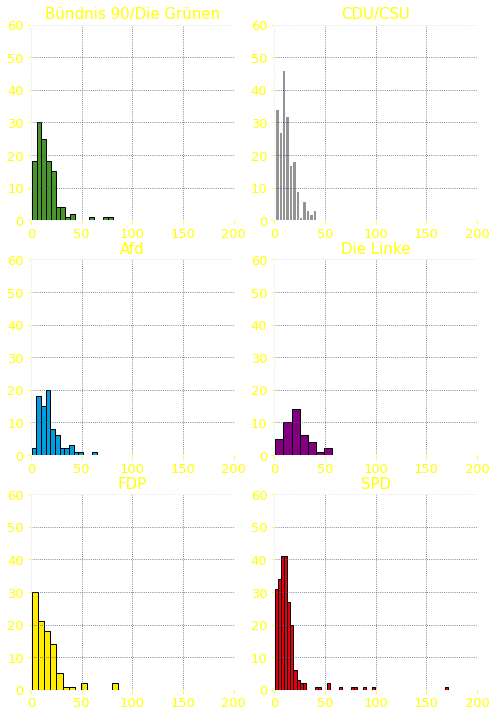

In [26]:
        
def haeufigkeiten_nach_partei(partei):
    
    #Initilaisieren der Benötigten Listen
    Haeufigkeiten = []
    Namen = []
    input_gefiltert = []
    
    #Filtern der Reden, sodass nur die Reden einer Partei in input_gefiltert auftauchen
    for rede in alleReden:
        if str.lower(rede['party'])==str.lower(partei):
            input_gefiltert.append(rede)
    
    #Herausschreiben der Redner, um im folgenden Schritt die Anzahl der Reden zu zählen
    for input_gef in input_gefiltert:
        Name_trial = input_gef['name']
        Name_trial = Name_trial.replace(u'\xa0', u' ')
        Name_trial = Name_trial.lower()
        Namen.append(Name_trial)

    Namen_einzeln = sorted(set(Namen))

    #Zählen der gehaltenen Reden pro Person
    for Name in Namen_einzeln:
            summe = 0
            for j in range(0, len(Namen)):
                if Name == Namen[j]:
                    summe += 1
            Haeufigkeiten.append(summe) 
    
    return Haeufigkeiten

def plot_haeufigkeiten(Liste_der_Parteien):
    
    mpl.rcParams["figure.figsize"] = (8,12)
    mpl.rcParams['figure.dpi'] = 72
    
    #Initialisieren der Plots
    figure, axis = plt.subplots(3, 2)
    
    axis[0, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[0]), bins='auto', color=colorcode['BÜNDNIS 90/DIE GRÜNEN'], edgecolor='black')
    axis[0, 0].set_title(Liste_der_Parteien[0], fontsize = 15)
    axis[0, 0].set_xlim(left=0, right=200)
    axis[0, 0].set_ylim(bottom=0, top=60)
    axis[0, 0].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[0, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[1]), bins='auto', color=colorcode['CDU/CSU'], edgecolor='white')
    axis[0, 1].set_title(Liste_der_Parteien[1], fontsize = 15)
    axis[0, 1].set_xlim(left=0, right=200)
    axis[0, 1].set_ylim(bottom=0, top=60)
    axis[0, 1].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    #axis[0, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[2]), bins = 75)
    #axis[0, 2].set_title(Liste_der_Parteien[2], fontsize = 25)
    
    axis[1, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[3]), bins='auto', color=colorcode['AfD'], edgecolor='black')
    axis[1, 0].set_title(Liste_der_Parteien[3], fontsize = 15)
    axis[1, 0].set_xlim(left=0, right=200)
    axis[1, 0].set_ylim(bottom=0, top=60)
    axis[1, 0].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[4]), bins='auto', color=colorcode['DIE LINKE'], edgecolor='black')
    axis[1, 1].set_title(Liste_der_Parteien[4], fontsize = 15)
    axis[1, 1].set_xlim(left=0, right=200)
    axis[1, 1].set_ylim(bottom=0, top=60)
    axis[1, 1].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[2, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[5]), bins='auto', color=colorcode['FDP'], edgecolor='black')
    axis[2, 0].set_title(Liste_der_Parteien[5], fontsize = 15)
    axis[2, 0].set_xlim(left=0, right=200)
    axis[2, 0].set_ylim(bottom=0, top=60)
    axis[2, 0].grid(visible=True, which='major', color='#445577', linestyle=':')
    
    axis[2, 1].grid(visible=True, which='major', color='#445577', linestyle=':')
    axis[2, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[6]), bins='auto', color=colorcode['SPD'], edgecolor='black')
    axis[2, 1].set_title(Liste_der_Parteien[6], fontsize = 15)
    axis[2, 1].set_xlim(left=0, right=200)
    axis[2, 1].set_ylim(bottom=0, top=60)
    
    
    #axis[2, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[7]), bins = 75)
    #axis[2, 1].set_title(Liste_der_Parteien[7], fontsize = 25)

    
    # Combine all the operations and display
    plt.show()
    
    from pathlib import Path
    fn = Path('~/Documents/party_hist_90deg.svg').expanduser()
    figure.savefig(fn, bbox_inches='tight', pad_inches=0)
    
    

Liste_der_Parteien = ["Bündnis 90/Die Grünen","CDU/CSU","Bremen","Afd","Die Linke","FDP","SPD","fraktionslos"]

plot_haeufigkeiten(Liste_der_Parteien)